In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alle .pkl-Dateien im aktuellen Arbeitsverzeichnis finden
pkl_files = [f for f in os.listdir() if f.endswith(".pkl")]

In [39]:
data_dict = {}
df_list = []

# Jede Datei laden und als ein großes DataFrame abspeichern
for file in pkl_files:
    if file != "logistic_regression_self_made.pkl":
        df = pd.read_pickle(file)
        df_list.append(df)

In [40]:
combined_df = pd.concat(df_list, axis=0, ignore_index=True)

In [41]:
combined_df

,Fold,Modell,ROC AUC,Accuracy
0,1,Gradient Boosting,0.772222,0.827586
1,2,Gradient Boosting,0.855556,0.793103
2,3,Gradient Boosting,0.811111,0.793103
3,4,Gradient Boosting,0.777778,0.655172
4,5,Gradient Boosting,0.802778,0.827586
5,6,Gradient Boosting,0.915205,0.785714
6,7,Gradient Boosting,0.842105,0.857143
7,8,Gradient Boosting,0.643275,0.642857
8,9,Gradient Boosting,0.746875,0.750000
9,10,Gradient Boosting,0.625000,0.678571


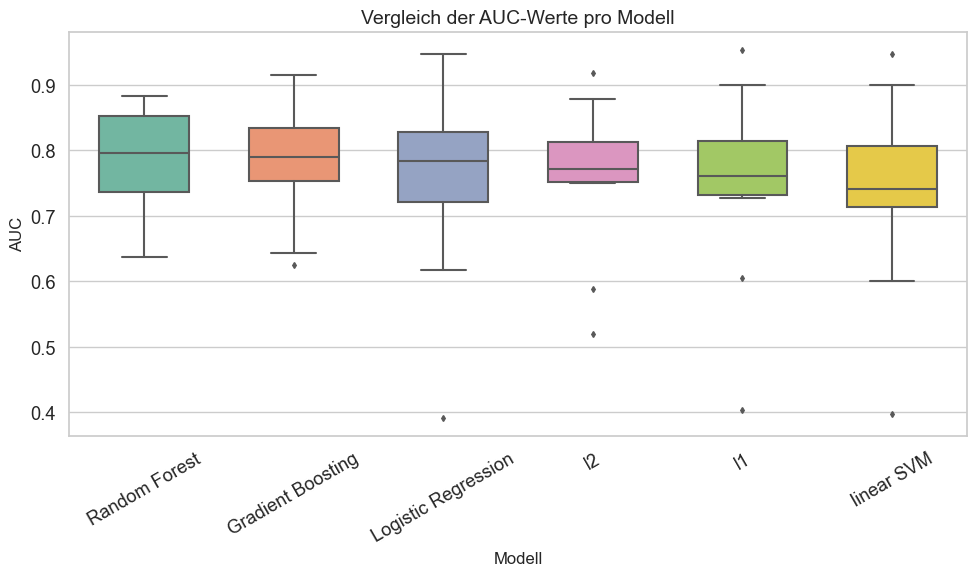

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionaler Style (professionell & sauber)
sns.set(style="whitegrid", font_scale=1.2)

ordered_models = combined_df.groupby("Modell")["ROC AUC"].median().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Modell",
    y="ROC AUC",
    data=combined_df,
    palette="Set2",        # oder "pastel", "muted", "deep"
    width=0.6,
    fliersize=3,
    order = ordered_models            # Größe der Ausreißerpunkte
)



# Achsentitel
ax.set_title("Vergleich der AUC-Werte pro Modell", fontsize=14)
ax.set_xlabel("Modell", fontsize=12)
ax.set_ylabel("AUC", fontsize=12)

# Layout sauber anpassen
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


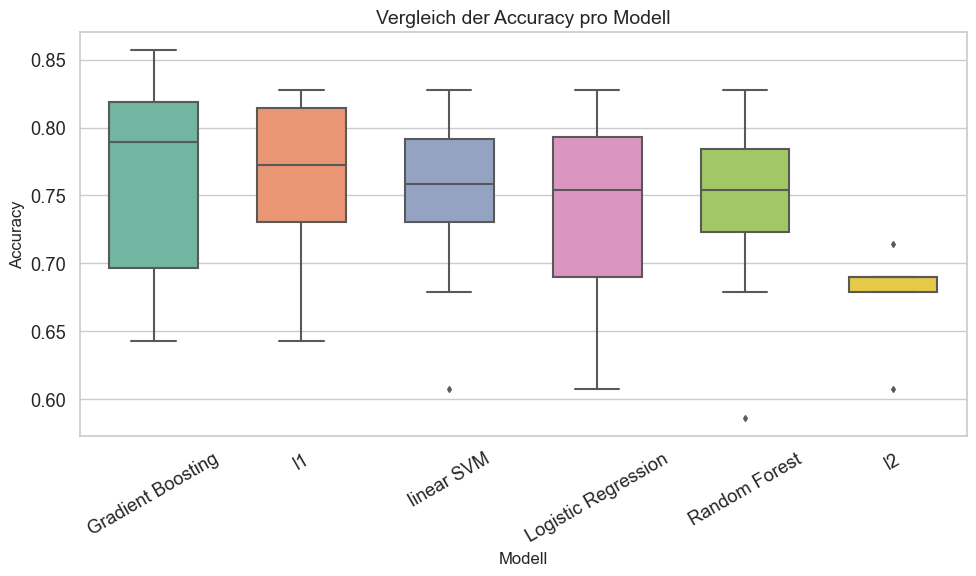

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionaler Style (professionell & sauber)
sns.set(style="whitegrid", font_scale=1.2)

ordered_models = combined_df.groupby("Modell")["Accuracy"].median().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Modell",
    y="Accuracy",
    data=combined_df,
    palette="Set2",        # oder "pastel", "muted", "deep"
    width=0.6,
    fliersize=3,
    order = ordered_models            # Größe der Ausreißerpunkte
)



# Achsentitel
ax.set_title("Vergleich der Accuracy pro Modell", fontsize=14)
ax.set_xlabel("Modell", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)

# Layout sauber anpassen
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()